In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry.point import Point

In [2]:
df_geo = gpd.read_file('data/malawi/grid/grid.shp')

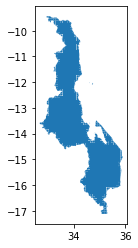

In [3]:
df_geo['geometry'].plot()

In [4]:
preds = pd.read_csv('results/malawi/ridge_phone_density/predictions.csv')

In [5]:
df_geo['centroid'] = df_geo['geometry'].centroid

In [6]:
df_geo['centroid_lat'] = df_geo['centroid'].apply(lambda point: point.y)
df_geo['centroid_lon'] = df_geo['centroid'].apply(lambda point: point.x)

In [7]:
preds['centroid_lon'] = preds['centroid_lon'].astype(np.float64)

In [8]:
df_geo['centroid_lat'] = df_geo['centroid_lat'].astype(np.float64)
df_geo['centroid_lon'] = df_geo['centroid_lon'].astype(np.float64)

In [9]:
# must use ints for merging
df_geo['merge_lat'] = (10000 * df_geo['centroid_lat']).astype(int)
df_geo['merge_lon'] = (10000 * df_geo['centroid_lon']).astype(int)

preds['merge_lat'] = (10000 * preds['centroid_lat']).astype(int)
preds['merge_lon'] = (10000 * preds['centroid_lon']).astype(int)

In [10]:
df_geo.shape, preds.shape

((1203, 16), (1203, 5))

In [11]:
merged = pd.merge(df_geo, preds.drop(['centroid_lat', 'centroid_lon'], axis=1), on=['merge_lat', 'merge_lon'])

In [12]:
merged.shape

(1203, 17)

In [13]:
merged.head()

,Shape_Leng,Shape_Area,ADM0_EN,ADM0_PCODE,ADM0_REF,ADM0ALT1EN,ADM0ALT2EN,date,validOn,validTo,geometry,centroid,centroid_lat,centroid_lon,merge_lat,merge_lon,predicted_phone_density
0,31.909743,8.001588,Malawi,MW,None,None,None,2018-09-03,2018-10-16,None,"MULTIPOLYGON (((32.76144 -13.56848, 32.76144 -...",POINT (32.71033 -13.57114),-13.571136,32.710327,-135711,327103,0.422026
1,31.909743,8.001588,Malawi,MW,None,None,None,2018-09-03,2018-10-16,None,"POLYGON ((32.69409 -13.57524, 32.72029 -13.575...",POINT (32.72372 -13.60814),-13.608144,32.723719,-136081,327237,0.642331
2,31.909743,8.001588,Malawi,MW,None,None,None,2018-09-03,2018-10-16,None,"POLYGON ((32.85127 -13.45789, 32.85127 -13.487...",POINT (32.84735 -13.47177),-13.471766,32.847355,-134717,328473,0.475031
3,31.909743,8.001588,Malawi,MW,None,None,None,2018-09-03,2018-10-16,None,"POLYGON ((32.84497 -13.48791, 32.85127 -13.487...",POINT (32.81763 -13.55146),-13.551465,32.817625,-135514,328176,0.075656
4,31.909743,8.001588,Malawi,MW,None,None,None,2018-09-03,2018-10-16,None,"POLYGON ((32.76144 -13.57524, 32.85127 -13.575...",POINT (32.80909 -13.61563),-13.615633,32.809090,-136156,328090,0.676284


In [15]:
geometry = merged['geometry']
coloring_guide = merged['predicted_phone_density']
cmap = 'inferno'
vmin = coloring_guide.min()
vmax = coloring_guide.max()

kwargs = {'vmin': vmin,
         'vmax': vmax,
         'cmap': cmap}


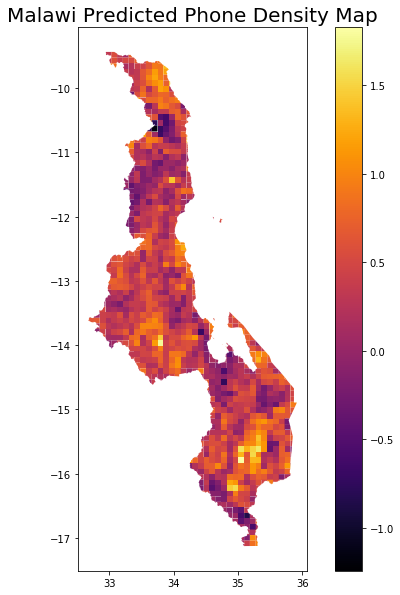

In [16]:
import matplotlib.cm as cm
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect("equal")
norm = colors.Normalize(vmin, vmax)
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
gpd.plotting.plot_polygon_collection(ax, geometry, values=coloring_guide, **kwargs)
ax.set_title('Malawi Predicted Phone Density Map', fontsize=20)

plt.show()